# Práctica 9: Máquinas de Vectores Soporte

Las máquinas de vectores soporte obtienen la superficie de decisión entre dos clases, $y \in \{-1,+1\}$, que maximiza el margen mediante la minimización de la función objetivo

$\min \frac{1}{2}\mathbf{w}^T\mathbf{w}$

sujeta a las restricciones

$y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$

donde $\mathbf{w}$ y $w_0$ se corresponden con el vector de pesos de la superficie de decisión lineal que separa las dos clases dejando el mayor margen a cada lado de la misma. La resolución del problema anterior mediante los multiplicadores de Lagrange se puede expresar como:

$\mathbf{w} = \sum_i \lambda_i y_i \mathbf{x}_i$

donde solo unos pocos $\lambda_i$ son diferentes de cero y que dan lugar a los denominado vectores soporte.

En algunos casos la minimización de la expresión $\min \frac{1}{2}\mathbf{w}^T\mathbf{w}$ con las restricciones $y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$ puede dar lugar a no encontrar una solución debido a que alguna muestra puede caer dentro del margen. Por tanto, se introduce un término de regularización con el objetivo de relajar la restricción $y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$, resolviéndose el problema siguiente:

$\min \frac{1}{2}\mathbf{w}^T\mathbf{w} + C \sum_{i=1}^n \zeta_i$

sujeto a

$y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1 - \zeta_i$

$\zeta_i \geq 0, i=1, \dots, n$

El parámetro $C$ controla el efecto de la regularización de forma que valores menores de este parámetro permite obtener márgenes más amplios a costa de clasificar erróneamente algunas muestras, mientras que valores mayores fuerza a que no existan muestras mal clasificadas aunque suponga márgenes más estrechos. Así, el parámetro $C$ se puede ver como una penalización por cada muestra mal clasificada (en el lado erróneo de la superficie de decisión). Es importante tenerlo en cuenta cuando en el conjunto de datos existan valores fuera de rango o mal clasificados. 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

## Efecto del parámetro de regularización $C$

Comprobar como para C pequeños => el número de vectores soporte es alto porque el margen aumenta. Para C altos => alta penalización por errores el número de vectores soporte está más próximo a la separación de las clases

In [53]:
df = pd.read_csv('datos/datos_svm.csv')
print(df.head())
X = df.values[:,:-1]
y = df.values[:,-1]

         x1        x2  y
0  1.491390 -0.638902  0
1  4.314272  2.673735  1
2 -0.443982 -0.434351  0
3  5.417299  4.807237  1
4 -1.085631  0.997345  0


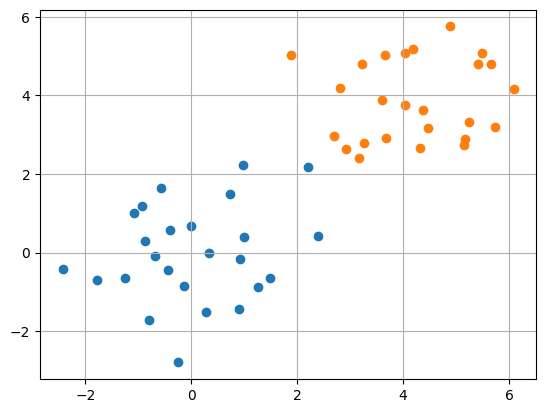

In [54]:
for clase in range(2):
    plt.scatter(X[y==clase,0], X[y==clase,1])
plt.grid()
plt.show()

Los vectores soporte se pueden acceder en el vector support_vectors_ de la clase SVC. Para comprobar el efecto del valor de C, se pueden mostrar la superficie de decisión y los vectores soporte para varios valores de C. P.e. C=1 que es el valor por defecto, C=0.01 y C=10.

In [66]:
clf = SVC(kernel='linear', C=10)
clf.fit(X,y)
vectores_soporte = clf.support_vectors_
print(f'Num. vectores soporte: {vectores_soporte.shape[0]}')
print(f'Vectores soporte: \n{clf.support_vectors_}')
print(f'Indices de los vectores soporte: {clf.support_}')

accuracy = clf.score(X,y) * 100
print(f'Accuracy: {accuracy:.2f}')

Num. vectores soporte: 3
Vectores soporte: 
[[2.20593008 2.18678609]
 [2.70591468 2.96121179]
 [2.91543209 2.63652846]]
Indices de los vectores soporte: [15 22 34]
Accuracy: 100.00


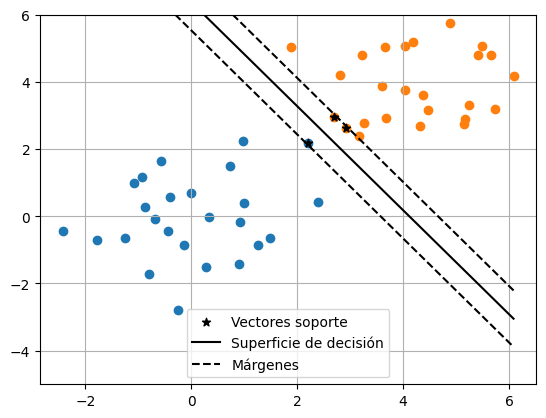

In [67]:
import numpy as np
import matplotlib.pyplot as plt

for clase in range(2):
    plt.scatter(X[y==clase, 0], X[y==clase, 1])
    
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            c='k', marker='*', label='Vectores soporte')

# Línea de decisión
m = -clf.coef_[0, 0] / clf.coef_[0, 1]
n = -clf.intercept_[0] / clf.coef_[0, 1]
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
decision = m * x_vals + n
plt.plot(x_vals, decision, 'k-', label='Superficie de decisión')

# Márgenes
margin = 2 / np.linalg.norm(clf.coef_) 
margin_up = decision + margin
margin_down = decision - margin
plt.plot(x_vals, margin_up, 'k--', label='Márgenes')
plt.plot(x_vals, margin_down, 'k--')

plt.ylim(-5, 6)
plt.grid()
plt.legend()
plt.show()


**Ejercicio de clase**

Utilizando el conjunto de datos datos_svm2.csv repetir lo realizado anteriormente para las tres clases, sin representar los margenes solo las rectas de decisión. Con C = 1


In [41]:
df = pd.read_csv('datos/datos_svm2.csv')
X = df.values[:,:-1]
y = df.values[:,-1]

In [42]:
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)

vectores_soporte = clf.support_vectors_
print(f'Num. vectores soporte: {vectores_soporte.shape[0]}')
# print(f'Vectores soporte: \n{clf.support_vectors_}')

Num. vectores soporte: 24


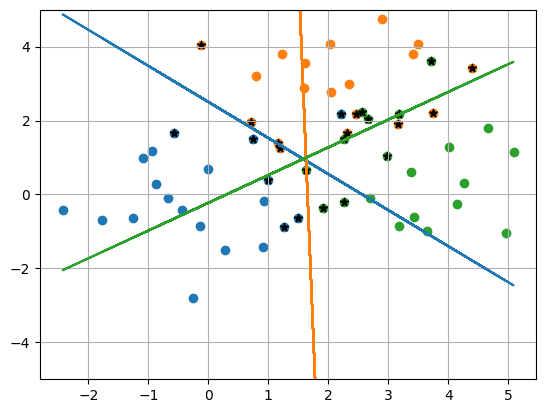

In [43]:
for clase in range(3):
    plt.scatter(X[y==clase,0], X[y==clase,1])
for vector in vectores_soporte:
    plt.scatter(vector[0], vector[1], c='k', marker='*')

for clase in range(3):
    m = -clf.coef_[clase,0]/clf.coef_[clase,1]
    n = -clf.intercept_[clase]/clf.coef_[clase,1]
    superficie = m * X[:,0] + n
    plt.plot(X[:,0], superficie)
plt.ylim(-5,5)
plt.grid()
plt.show()


## Rendimiento con clases no linealmente separables

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression

In [45]:
df = pd.read_csv('datos/datos_svm3.csv')
X = df.values[:,:-1]
y = df.values[:,-1]

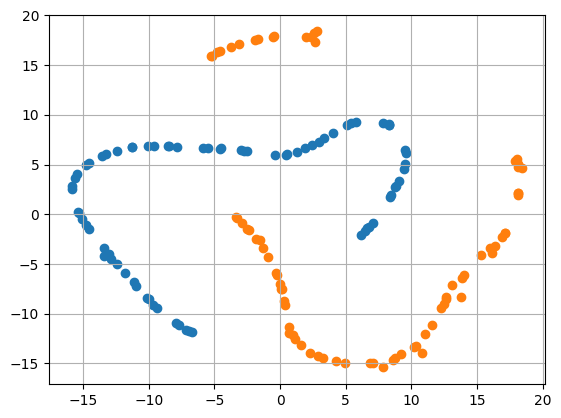

In [46]:
for clase in range(2):
    plt.scatter(X[y==clase,0], X[y==clase,1])
plt.grid()
plt.show()

**Ejercicio de clase**

Dividir en train test 80/20 y entrenar un clasificador lineal y obtener la exactitud

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud regresión logística: {exactitud*100:.1f}')

Exactitud regresión logística: 63.3


Entrenar el SVC con diferentes núcleos y comprobar la exactitud

In [24]:
nucleos = ['linear', 'poly', 'rbf', 'sigmoid']

# nucleos = ['rbf']

for nucleo in nucleos:
    clf = SVC(kernel=nucleo, C=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud núcleo {nucleo}: {exactitud*100:.1f}')

Exactitud núcleo linear: 66.7
Exactitud núcleo poly: 76.7
Exactitud núcleo rbf: 100.0
Exactitud núcleo sigmoid: 53.3


Explicar la función miembro de la clase *decision_funtion* que dada una muestra devuelve el resultado de evaluar la función discriminante de la misma.

Aplicar la función discriminante a las muestras positivas y negativas del conjunto de test y comprobar si están bien clasificadas o no

In [25]:
f = clf.decision_function(X_test)
for i in range(y_test.shape[0]):
    print(f'{y_test[i]} -> {f[i]}')

0.0 -> 3.34529940230098
0.0 -> -23.253623390998147
0.0 -> -0.6104702144983165
0.0 -> 16.429648258276764
0.0 -> 26.806418626929833
1.0 -> 18.939526213390124
1.0 -> 43.68791411499006
1.0 -> 8.908225806666081
0.0 -> -14.57853333510209
1.0 -> 28.03107786099734
1.0 -> 64.7427816472591
1.0 -> 26.3690284925193
0.0 -> 1.5725222351214856
0.0 -> 26.149666922470296
1.0 -> -23.328541830763402
0.0 -> -4.162366477167416
1.0 -> 36.36632346719373
1.0 -> -47.331780845581555
0.0 -> -6.484251239949535
1.0 -> -61.443303094232164
1.0 -> -30.506475629488193
1.0 -> -27.826446539467796
0.0 -> -24.688985862249865
1.0 -> -63.002192053928184
1.0 -> -28.02197080985306
1.0 -> -10.776893286594744
1.0 -> 19.939022211852667
0.0 -> 23.907041193165707
1.0 -> 2.5860647289039074
0.0 -> -26.826716196141046


## Comparar SVC con clasificadores previos en problemas reales

El rango de entrada de las variables en el SVM afecta bastante. Para comprobarlo se entrena tanto un clasificador lineal como el SVM con diferentes núcleos sin normalizar las variables de entrada (recordar que para el precio de las casas había mucha variabilidad de rangos) y normalizando mediante escalado linear y estandarización.

También probar diferentes valores del parámetro de regularización C, para comprobar su efecto en la exactitud.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
df = pd.read_csv('datos/precio_casas_clasificacion.csv')
# df = df.sample(frac=0.5)
X = df.values[:,:-1]
y = df.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# scaler = StandardScaler()
scaler = MinMaxScaler((-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud regresión logística: {exactitud*100:.1f}')

Exactitud regresión logística: 57.2


In [33]:
nucleos = ['linear', 'poly', 'rbf', 'sigmoid']

for nucleo in nucleos:
    clf = SVC(kernel=nucleo, C=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud núcleo {nucleo}: {exactitud*100:.1f}')

Exactitud núcleo linear: 57.0
Exactitud núcleo poly: 59.9
Exactitud núcleo rbf: 60.2
Exactitud núcleo sigmoid: 30.4


Repetir el ejemplo anterior pero en este caso para el conjunto de datos de las caras. 

In [32]:
df_train = pd.read_csv('CelebA-1K-train.csv')
X_train = df_train.values[:,2:]
y_train = df_train.values[:,1]

df_test = pd.read_csv('CelebA-1K-test.csv')
X_test = df_test.values[:,2:]
y_test = df_test.values[:,1]


FileNotFoundError: [Errno 2] No such file or directory: 'CelebA-1K-train.csv'

In [ ]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud regresión logística: {exactitud*100:.1f}')

In [ ]:
nucleos = ['linear', 'poly', 'rbf', 'sigmoid']

for nucleo in nucleos:
    clf = SVC(kernel=nucleo)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud núcleo {nucleo}: {exactitud*100:.1f}')